In [1]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Pytorch Lib
import torch
import random
import torch.utils.data as data_utils
import torch.nn as nn
import torch.nn.functional as F

In [2]:
import numpy as np
import os
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Loading the dataset from github repo
url = 'https://raw.githubusercontent.com/hargurjeet/MachineLearning/Wheat-Seeds/seeds.csv'
df = pd.read_csv(url)

df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
df.shape

(199, 8)

In [5]:
df.Type.value_counts()

2    68
1    66
3    65
Name: Type, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             199 non-null    float64
 1   Perimeter        199 non-null    float64
 2   Compactness      199 non-null    float64
 3   Kernel.Length    199 non-null    float64
 4   Kernel.Width     199 non-null    float64
 5   Asymmetry.Coeff  199 non-null    float64
 6   Kernel.Groove    199 non-null    float64
 7   Type             199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


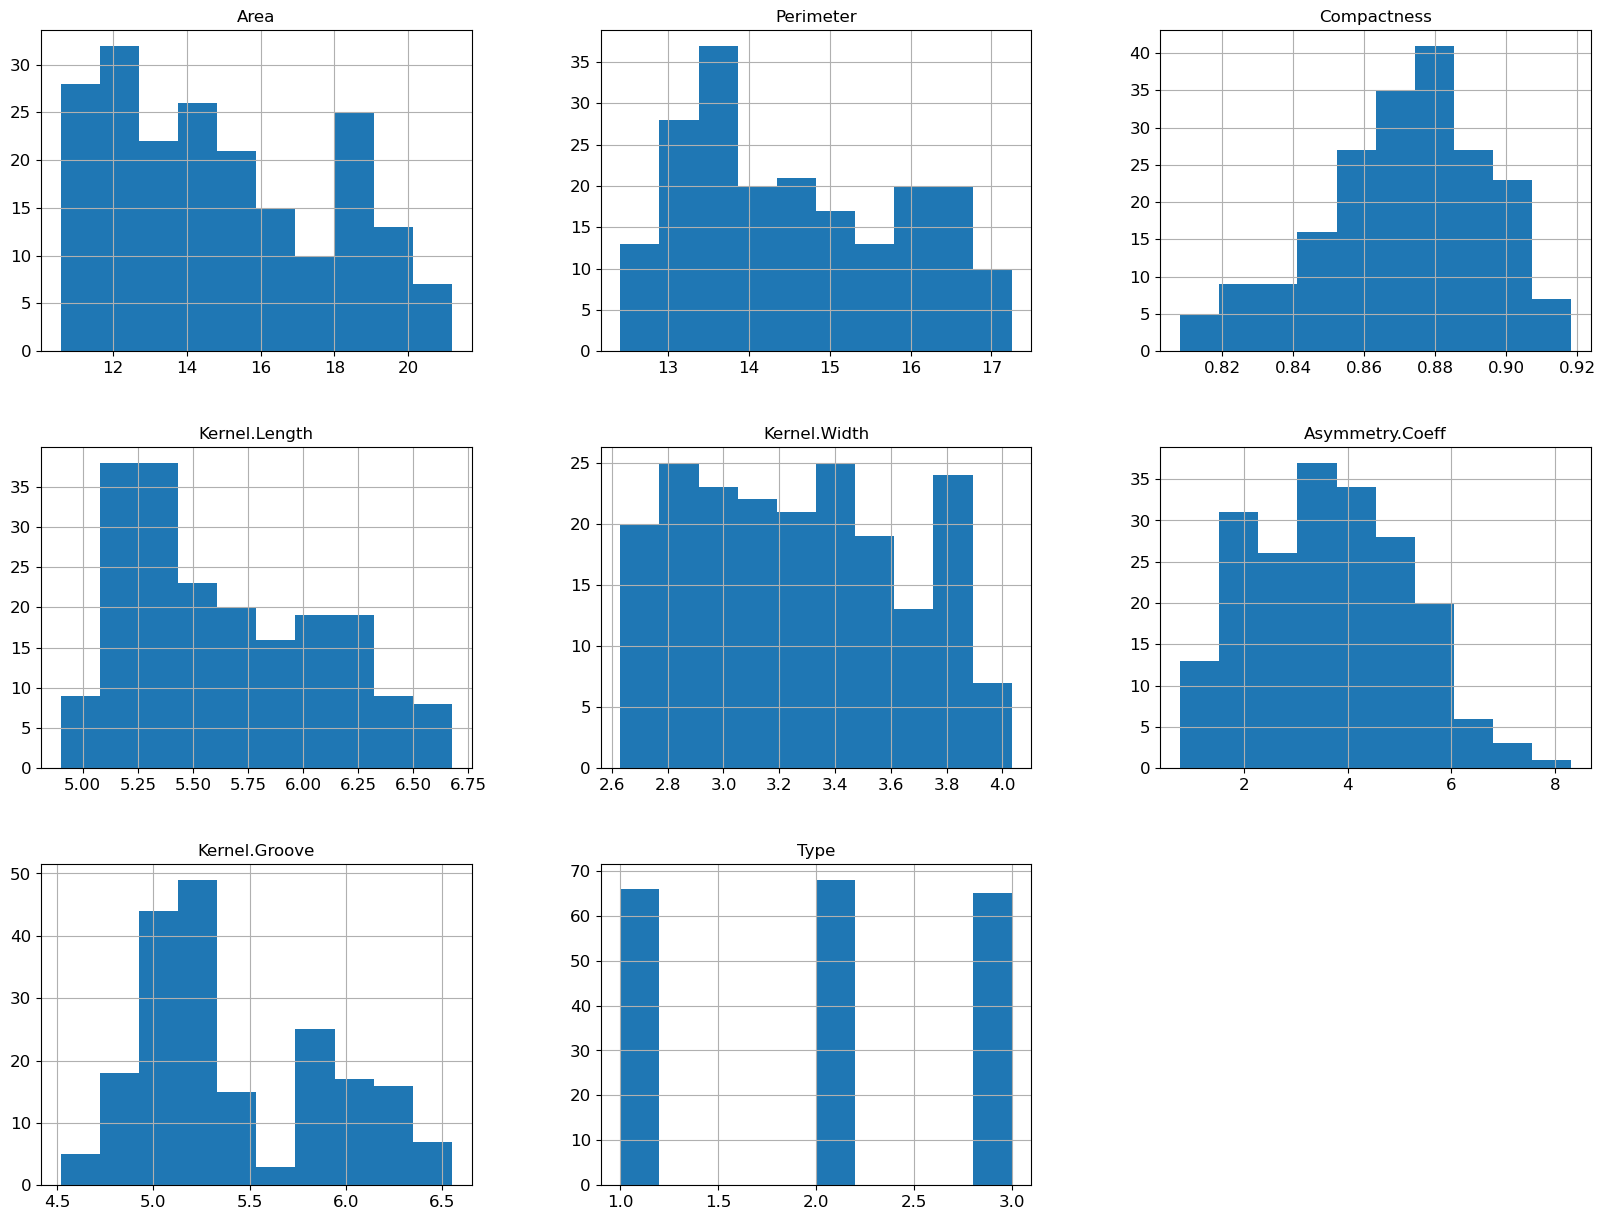

In [7]:
df.hist(figsize=(20,15));

In [8]:
df.corr()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
Area,1.000000,0.994437,0.609887,0.951126,0.970980,-0.222820,0.862727,-0.340664
Perimeter,0.994437,1.000000,0.531841,0.972944,0.945496,-0.211034,0.889543,-0.322223
Compactness,0.609887,0.531841,1.000000,0.374011,0.762167,-0.329400,0.227016,-0.539261
Kernel.Length,0.951126,0.972944,0.374011,1.000000,0.862680,-0.169704,0.932124,-0.249422
Kernel.Width,0.970980,0.945496,0.762167,0.862680,1.000000,-0.253122,0.748228,-0.421961
Asymmetry.Coeff,-0.222820,-0.211034,-0.329400,-0.169704,-0.253122,1.000000,-0.003349,0.573956
Kernel.Groove,0.862727,0.889543,0.227016,0.932124,0.748228,-0.003349,1.000000,0.035508
Type,-0.340664,-0.322223,-0.539261,-0.249422,-0.421961,0.573956,0.035508,1.000000


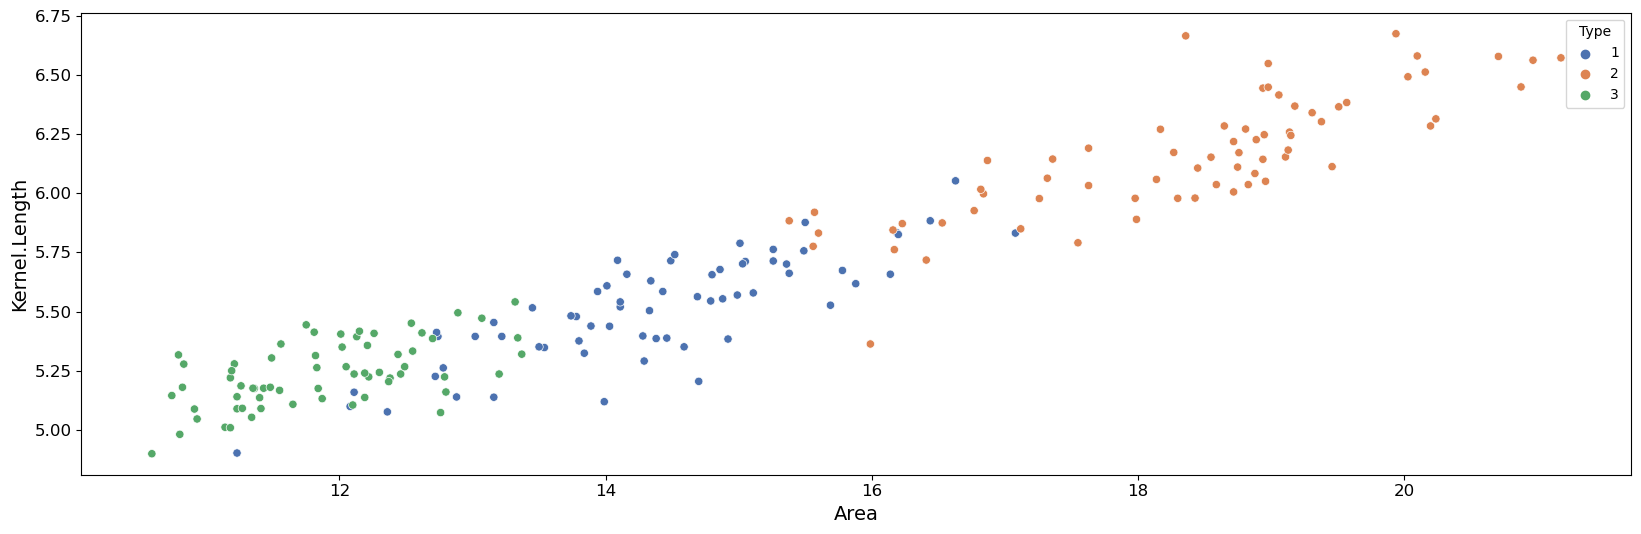

In [9]:
plt.rcParams["figure.figsize"] = (20,6)
sns.scatterplot(data=df, x="Area", y="Kernel.Length", hue="Type",  palette="deep");

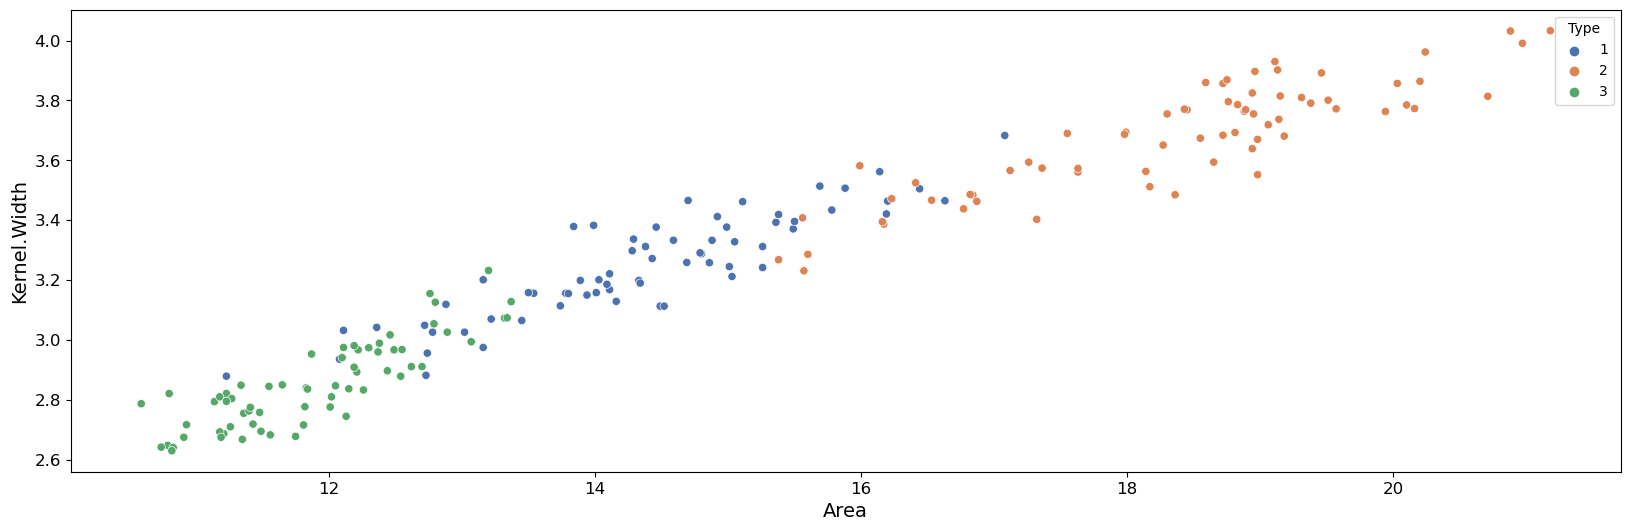

In [10]:
sns.scatterplot(data=df, x="Area", y="Kernel.Width", hue="Type", palette="deep");

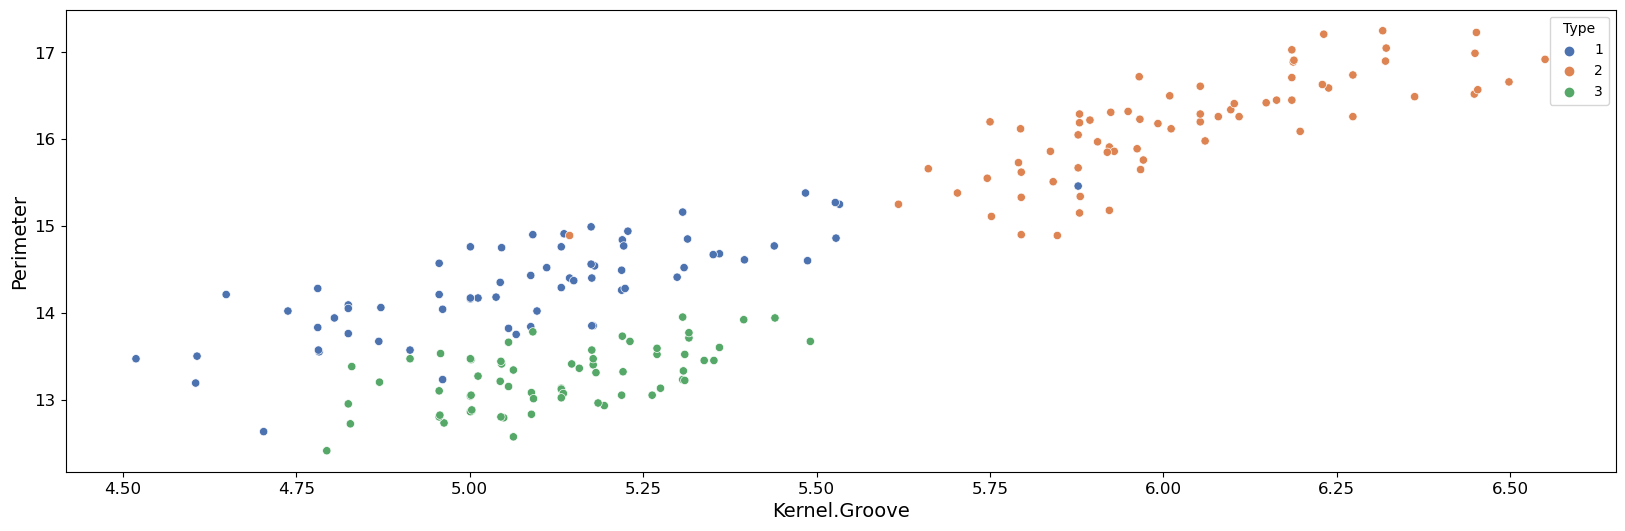

In [11]:
sns.scatterplot(data=df, x="Kernel.Groove", y="Perimeter", hue="Type", palette="deep");

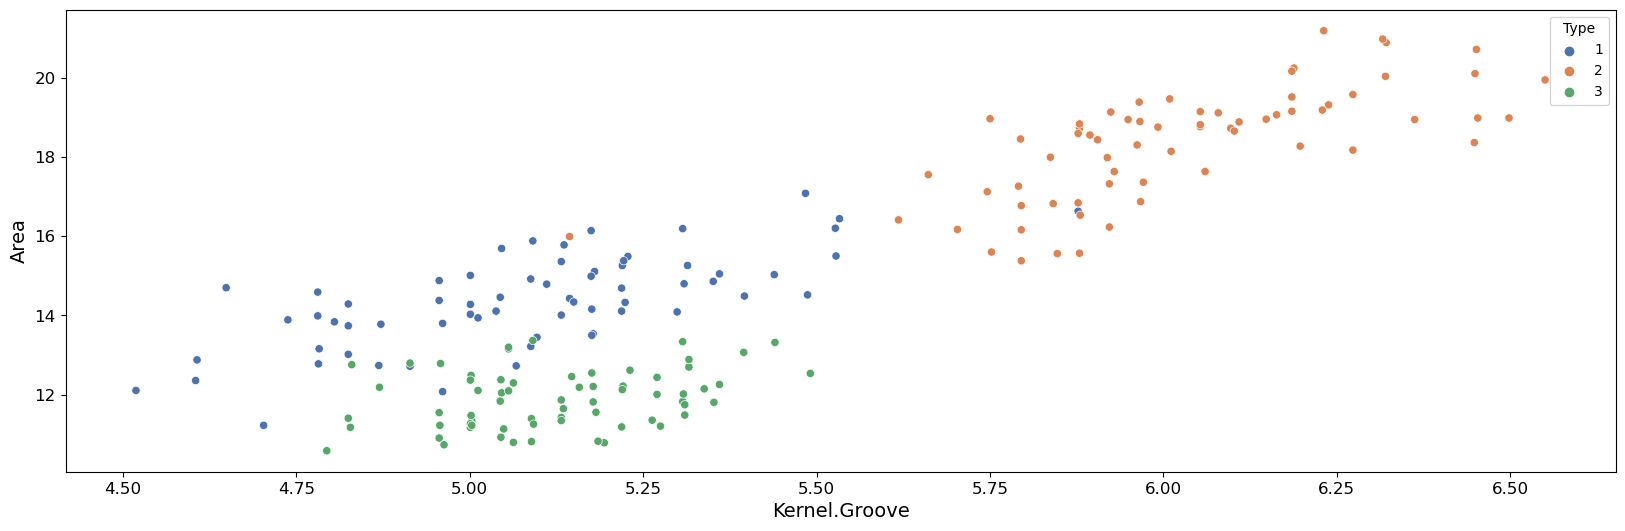

In [12]:
sns.scatterplot(data=df, x="Kernel.Groove", y="Area", hue="Type", palette="deep");

In [13]:
# Converting the data to tensors
from torch.utils.data import random_split
import torch
import random
from torch.utils.data import TensorDataset

# this is to update the labels from 1, 2, 3 to 0, 1, 2
def update_values_(df):
  for i in range(len(df)):
    df[i] = df[i] - 1

  return df

train_target = torch.tensor(df['Type'].values.astype(np.int64))
train = torch.tensor(df.drop('Type', axis = 1).values.astype(np.float32))


train_tensor = TensorDataset(train, update_values_(train_target))

train_ds, val_ds = random_split(train_tensor, [180, 19])
len(train_ds), len(val_ds)

(180, 19)

In [14]:
from torch.utils.data import DataLoader

batch_size = 64

train_loader = DataLoader(train_ds, batch_size, shuffle = True)
val_loader = DataLoader(val_ds, batch_size)

In [15]:
import torch.nn as nn

input_size = 1*7
num_classes = 3

model = nn.Linear(input_size, num_classes)

In [16]:
class Wheatseed(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        # xb = xb.reshape(-1, 7)
        out = self.linear(xb)
        return out
    
model = Wheatseed()

In [17]:
model.linear

Linear(in_features=7, out_features=3, bias=True)

In [18]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    print(labels.shape)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([64, 7])
torch.Size([64])
outputs.shape :  torch.Size([64, 3])
Sample outputs :
 tensor([[ 1.0355, -7.2434, -1.9096],
        [ 1.8971, -6.8990, -2.1963]])


In [19]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history


def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [20]:
class Wheatseed(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        # xb = xb.reshape(-1, 7)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = Wheatseed()

In [21]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [22]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 5.790276527404785, 'val_acc': 0.31578946113586426}

In [23]:
model = Wheatseed()


In [24]:
history1 = fit(5, 0.001, model, train_loader, val_loader)


Epoch [0], val_loss: 3.2756, val_acc: 0.5263
Epoch [1], val_loss: 3.0944, val_acc: 0.4737
Epoch [2], val_loss: 2.9096, val_acc: 0.4211
Epoch [3], val_loss: 2.7208, val_acc: 0.4211
Epoch [4], val_loss: 2.5372, val_acc: 0.4211


In [25]:
history2 = fit(5, 0.001, model, train_loader, val_loader)


Epoch [0], val_loss: 2.3486, val_acc: 0.4211
Epoch [1], val_loss: 2.1609, val_acc: 0.4211
Epoch [2], val_loss: 1.9776, val_acc: 0.4211
Epoch [3], val_loss: 1.7981, val_acc: 0.4211
Epoch [4], val_loss: 1.6248, val_acc: 0.4211


In [26]:
history3 = fit(5, 0.001, model, train_loader, val_loader)


Epoch [0], val_loss: 1.4700, val_acc: 0.4211
Epoch [1], val_loss: 1.3334, val_acc: 0.4211
Epoch [2], val_loss: 1.2240, val_acc: 0.4211
Epoch [3], val_loss: 1.1572, val_acc: 0.4211
Epoch [4], val_loss: 1.1185, val_acc: 0.4211


In [32]:
history4 = fit(5, 0.001, model, train_loader, val_loader)


Epoch [0], val_loss: 1.0748, val_acc: 0.4211
Epoch [1], val_loss: 1.0740, val_acc: 0.3684
Epoch [2], val_loss: 1.0738, val_acc: 0.3158
Epoch [3], val_loss: 1.0682, val_acc: 0.3684
Epoch [4], val_loss: 1.0639, val_acc: 0.3684


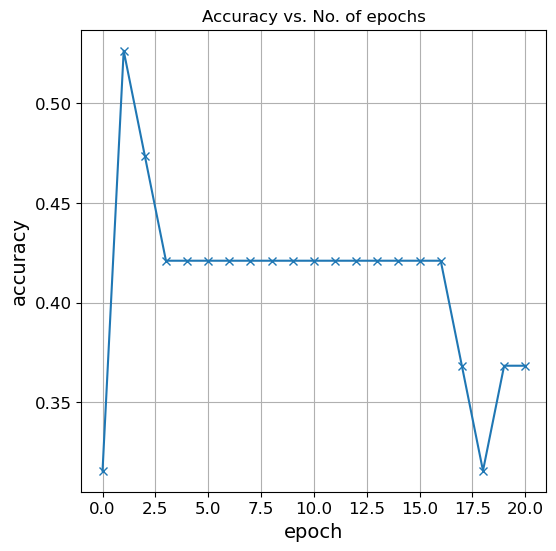

In [33]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.rcParams["figure.figsize"] = (6,6)
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()
plt.title('Accuracy vs. No. of epochs')
plt.show();